<a href="https://colab.research.google.com/github/bhanupriya9916/bhanu121998/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# KNN Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
glass=pd.read_csv('/content/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#EDA and Data Visualization
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
#Independent and dependent variables
X=glass.iloc[:,:-1].values
y=glass.iloc[:,-1].values

In [9]:
corr=glass.corr()
corr


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

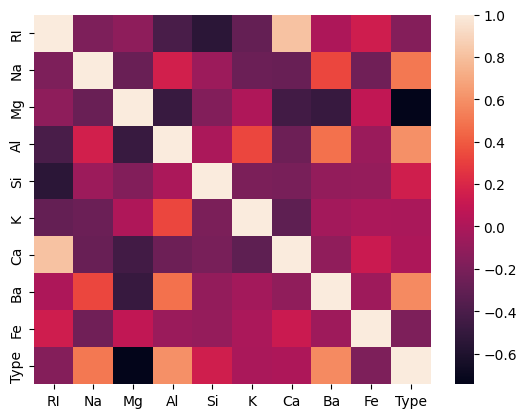

In [10]:
import seaborn as sns
sns.heatmap(corr)

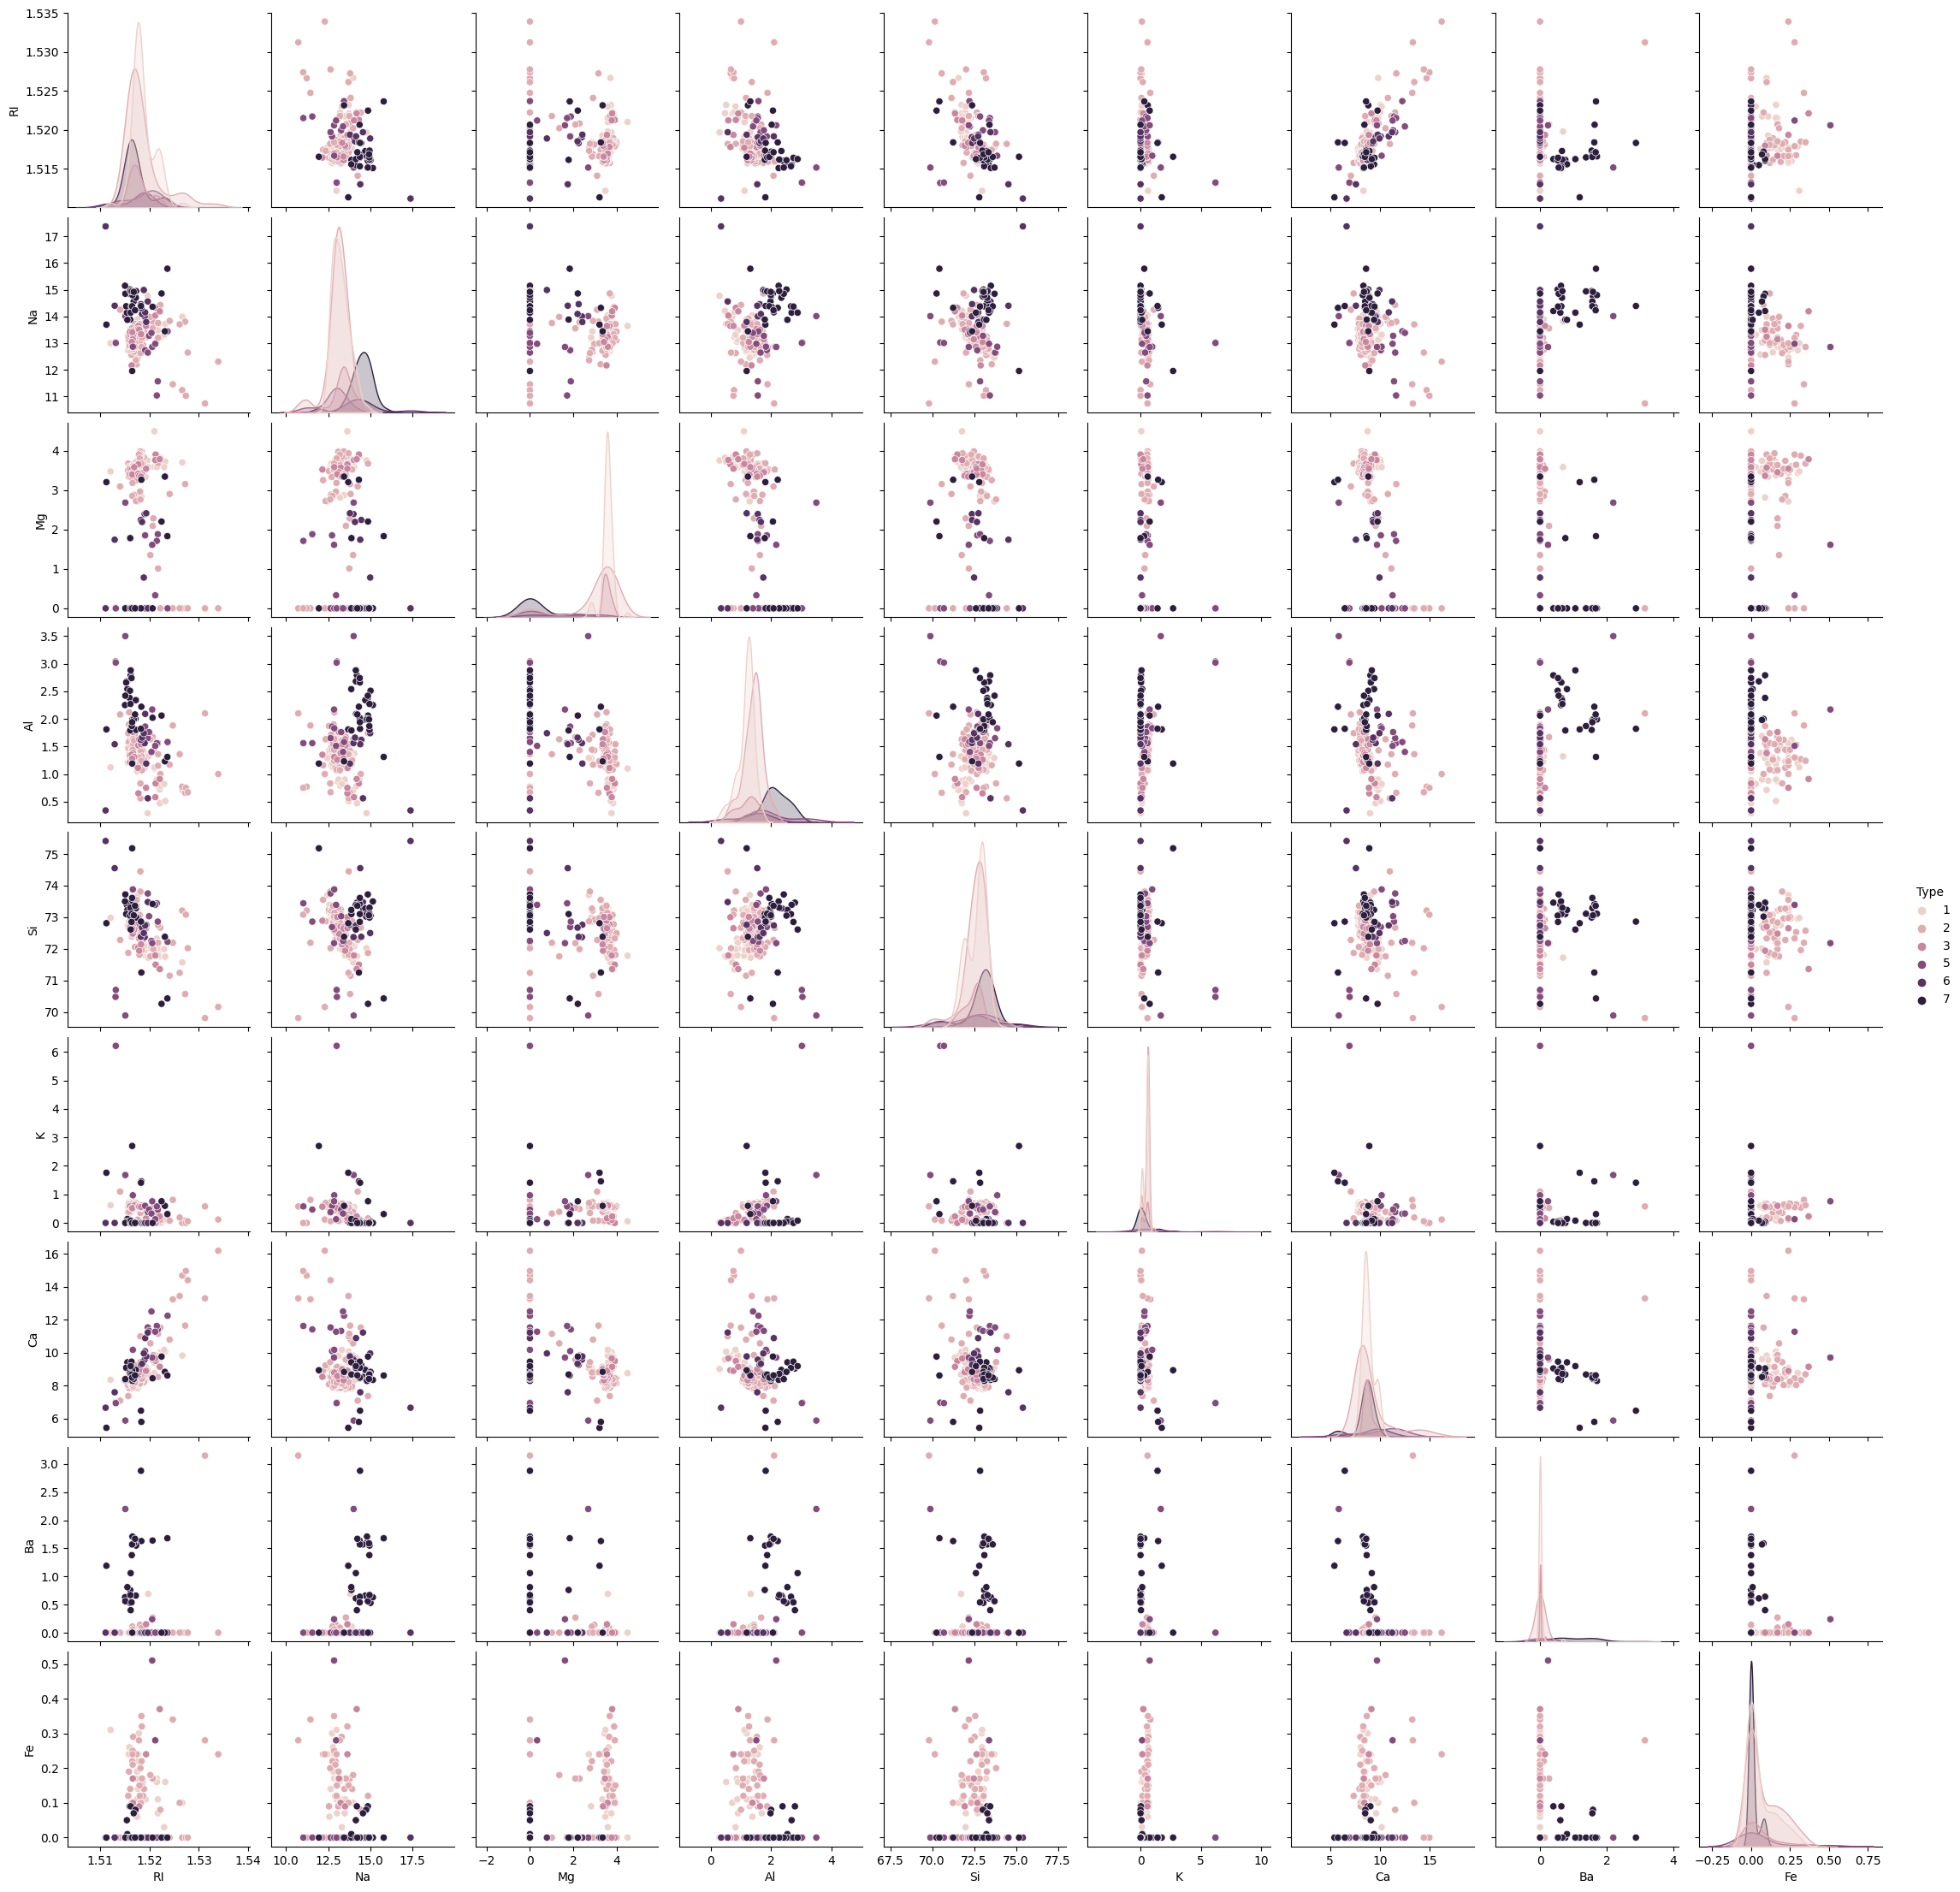

In [15]:
#pairwise plot of all the features
sns.pairplot(glass,hue='Type')
plt.show()

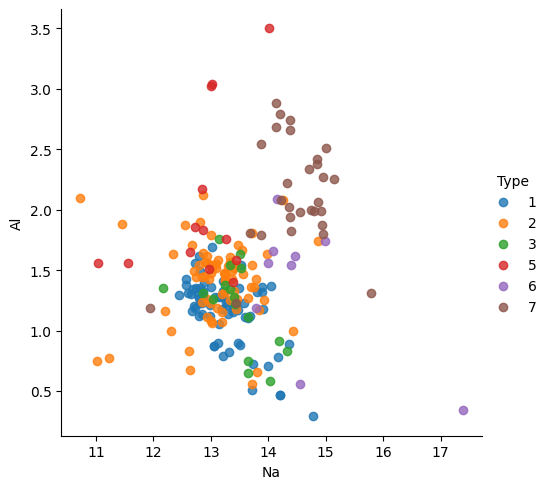

In [16]:
sns.lmplot(data=glass,x='Na',y='Al',hue='Type',fit_reg=False)


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
     

In [18]:
from sklearn.neighbors import KNeighborsClassifier #fitting the model
classifier=KNeighborsClassifier(n_neighbors= 5,metric= 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred=classifier.predict(X_test)

In [20]:
y_pred

array([7, 1, 2, 6, 5, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 7, 1, 2, 1, 1, 5, 1,
       7, 6, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 7, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 5, 7, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1])

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score #create confusion matrics and get accuracy score
cm=confusion_matrix(y_test,y_pred)      #accuracy
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)

[[16  5  0  0  0  0]
 [ 7 18  0  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  1  6]]
0.6615384615384615


In [22]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [23]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [24]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


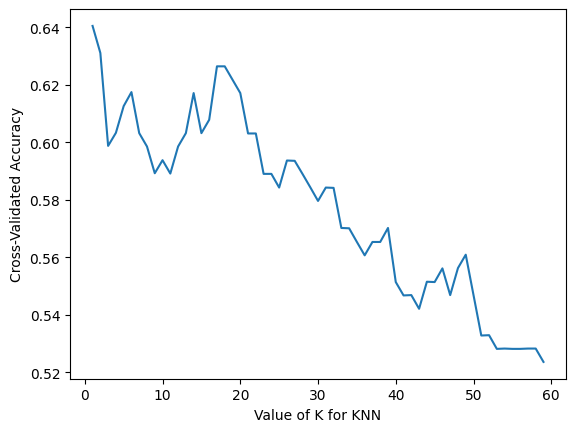

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1,60 )
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

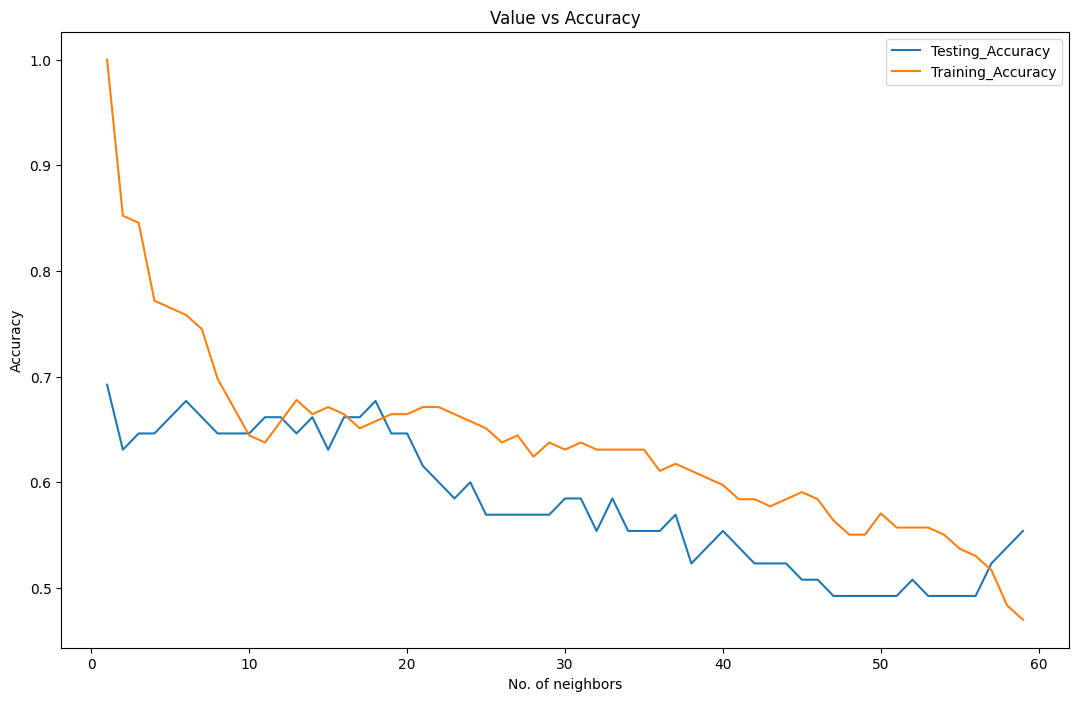

In [27]:
k_values = np.arange(1,60)
train_accuracy = []
test_accuracy = []

for i,k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
plt.figure(figsize=[13,8])
plt.plot(k_values,test_accuracy,label='Testing_Accuracy')
plt.plot(k_values,train_accuracy,label='Training_Accuracy')
plt.title('Value vs Accuracy')
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
zoo=pd.read_csv('/content/Zoo.csv')
 

In [31]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [32]:
#EDA AND VISUALIZATION
zoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [33]:
zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [47]:
zoo.describe()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,49.257426,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,28.968829,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,74.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [49]:
# finding Unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['blue', 'red']

array([[<Axes: xlabel='animal name', ylabel='animal name'>,
        <Axes: xlabel='hair', ylabel='animal name'>,
        <Axes: xlabel='feathers', ylabel='animal name'>,
        <Axes: xlabel='eggs', ylabel='animal name'>,
        <Axes: xlabel='milk', ylabel='animal name'>,
        <Axes: xlabel='airborne', ylabel='animal name'>,
        <Axes: xlabel='aquatic', ylabel='animal name'>],
       [<Axes: xlabel='animal name', ylabel='hair'>,
        <Axes: xlabel='hair', ylabel='hair'>,
        <Axes: xlabel='feathers', ylabel='hair'>,
        <Axes: xlabel='eggs', ylabel='hair'>,
        <Axes: xlabel='milk', ylabel='hair'>,
        <Axes: xlabel='airborne', ylabel='hair'>,
        <Axes: xlabel='aquatic', ylabel='hair'>],
       [<Axes: xlabel='animal name', ylabel='feathers'>,
        <Axes: xlabel='hair', ylabel='feathers'>,
        <Axes: xlabel='feathers', ylabel='feathers'>,
        <Axes: xlabel='eggs', ylabel='feathers'>,
        <Axes: xlabel='milk', ylabel='feathers'>,
        

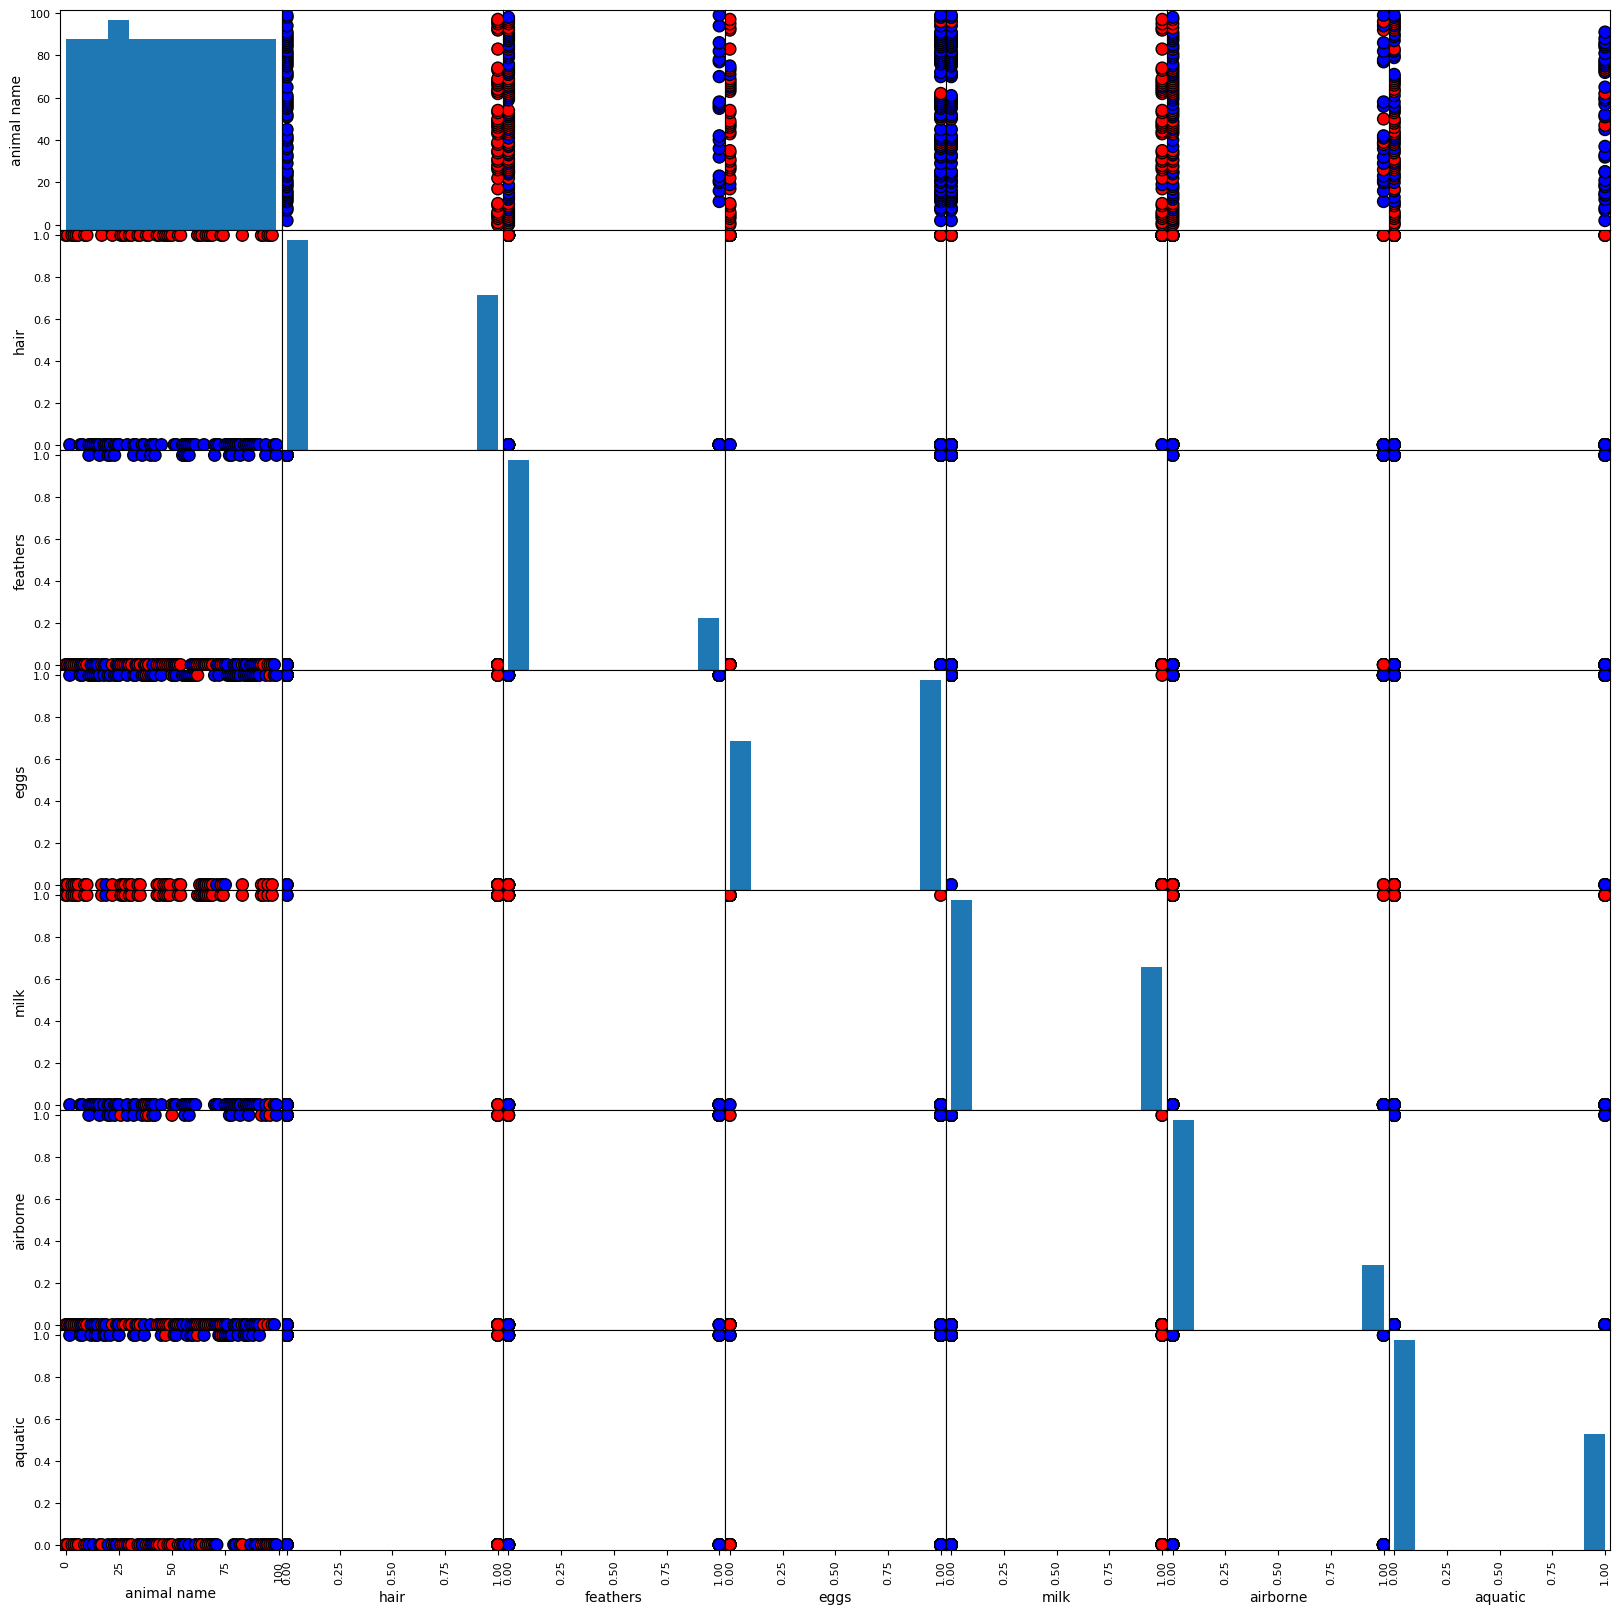

In [51]:
# scatter matrix to observe relationship between every colomn attribute. 
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")

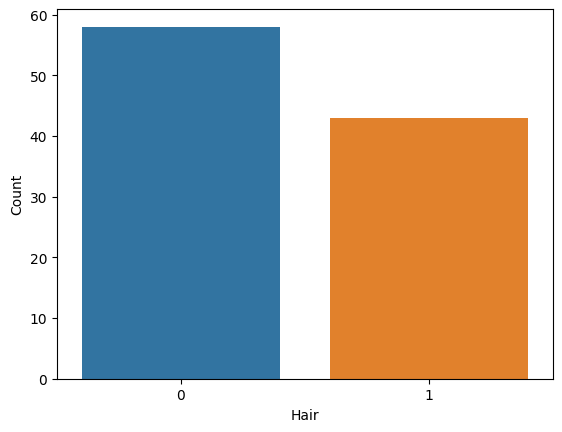

0    58
1    43
Name: hair, dtype: int64

In [53]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

[]

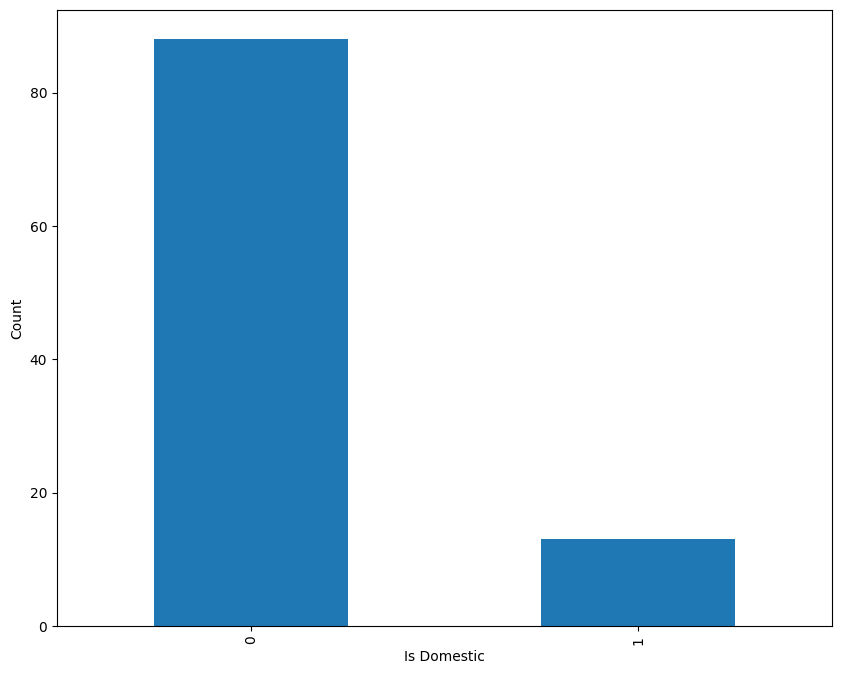

In [54]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(10,8));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

In [55]:
pd.crosstab(zoo['type'], zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


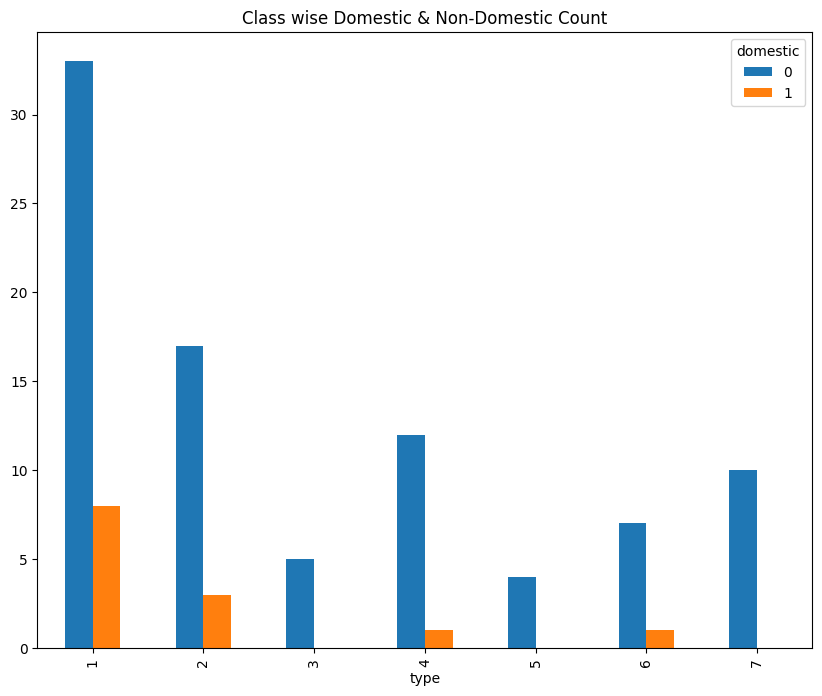

In [56]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(zoo['type'], zoo['domestic']).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

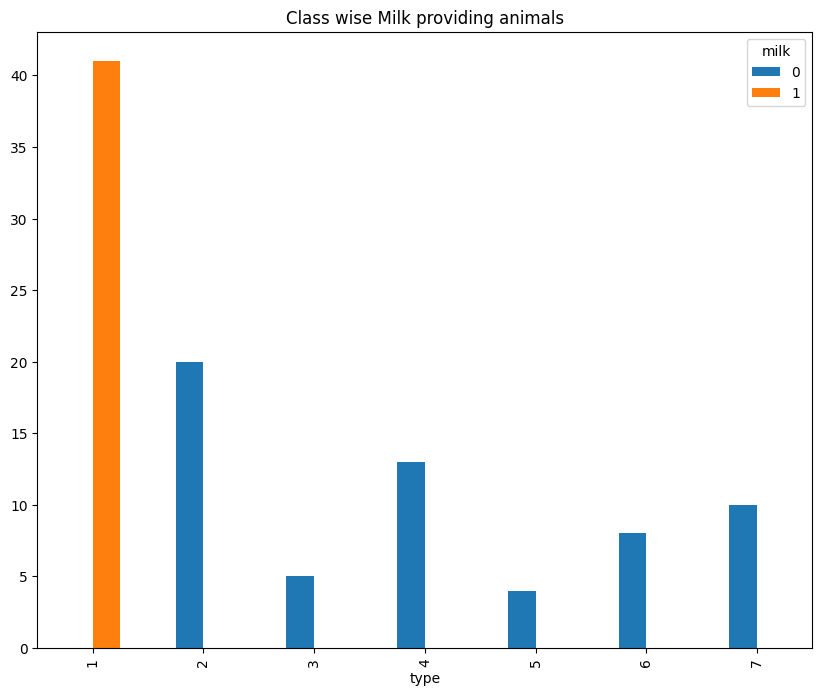

In [57]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8), title="Class wise Milk providing animals");
plt.plot();

In [58]:
zoo[zoo['aquatic']==1].type.value_counts()

4    13
7     6
1     6
2     6
5     4
3     1
Name: type, dtype: int64

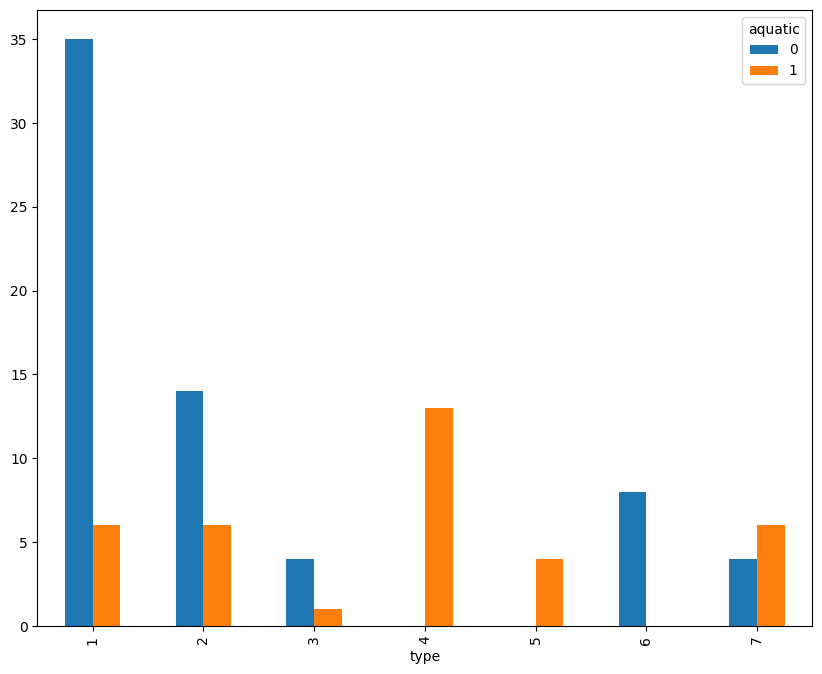

In [59]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

In [35]:
from sklearn.preprocessing import LabelEncoder
label_x=LabelEncoder()
zoo['animal name']=label_x.fit_transform(zoo['animal name'])

In [36]:
zoo.head(4)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [37]:
array=zoo.values
X = array[:, 1:17]
Y = array[:, -1]

In [38]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

In [62]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [64]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [66]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0
62,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
65,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1


In [67]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
24,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0
56,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
18,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0


In [68]:
Y_train

33    0
58    1
62    0
25    0
82    0
     ..
35    0
83    0
59    0
65    1
77    0
Name: catsize, Length: 70, dtype: int64

In [69]:
Y_test

55     1
0      1
16     0
12     0
24     0
56     1
17     1
18     1
13     0
100    0
47     1
72     0
71     1
36     0
32     1
5      1
2      0
86     1
14     0
97     0
30     0
41     0
27     0
80     0
60     1
44     1
7      0
21     0
95     1
63     1
15     0
Name: catsize, dtype: int64

In [39]:
num_folds = 4
kfold = KFold(n_splits=4)

In [40]:
model = KNeighborsClassifier(n_neighbors=13)
results = cross_val_score(model, X, Y, cv=kfold)

In [41]:
print(results.mean())

0.751923076923077


In [42]:
# Grid Search for Algorithm Tuning
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [44]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [45]:
print(grid.best_score_)
print(grid.best_params_)
     

0.97
{'n_neighbors': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py", line 810, in kneighbors
    raise ValueError(
ValueError: E

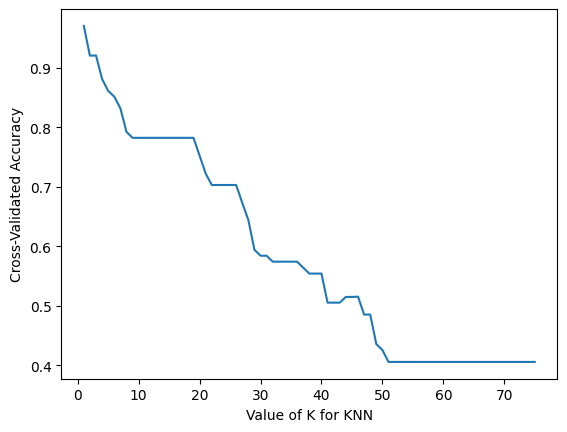

In [46]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 80)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()